In [143]:
import pandas as pd
import datetime as dt
stk_data = pd.read_csv("TataCofee.csv")

In [144]:
stk_data

,Open,High,Low,Close
0,1410.60,1427.90,1408.30,1415.10
1,1421.00,1626.60,1416.15,1607.40
2,1632.55,1673.90,1613.05,1626.20
3,1627.75,1627.75,1574.60,1579.05
4,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2220,202.90,207.80,201.35,205.00
2221,206.00,206.85,202.05,202.95
2222,203.90,203.90,199.35,201.00
2223,200.00,222.00,196.00,218.35


In [145]:
column="Close"
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1 = Ms.fit_transform(stk_data[[column]])
data1.shape

(2225, 1)

In [146]:
training_size = round(len(data1)*0.95)
x_train = data1[:training_size]
x_test = data1[training_size:]
y_train=data1[:training_size]
y_test = data1[training_size:]

In [160]:
from sklearn.metrics import mean_squared_error
tends = ['n','t','c','ct']

orders = [(0,0,1),(0,0,2)]
from statsmodels.tsa.arima.model import ARIMA
for td in tends:
        model = ARIMA(x_train,order=(0,0,1),trend=td)
        model_fit = model.fit()
        y_pred = model_fit.predict(len(x_train), len(data1)-1)
        from sklearn.metrics import r2_score
        mse = mean_squared_error(y_test,y_pred,squared=False)
        from stockFunctions import rmsemape
        rmsemape(y_test,y_pred)
        print("*********************************")

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE-Testset: 0.10043760019645182
*********************************


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE-Testset: 0.00865282252441626
*********************************
RMSE-Testset: 0.08529881111761899
*********************************


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE-Testset: 0.28318231487890116
*********************************


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


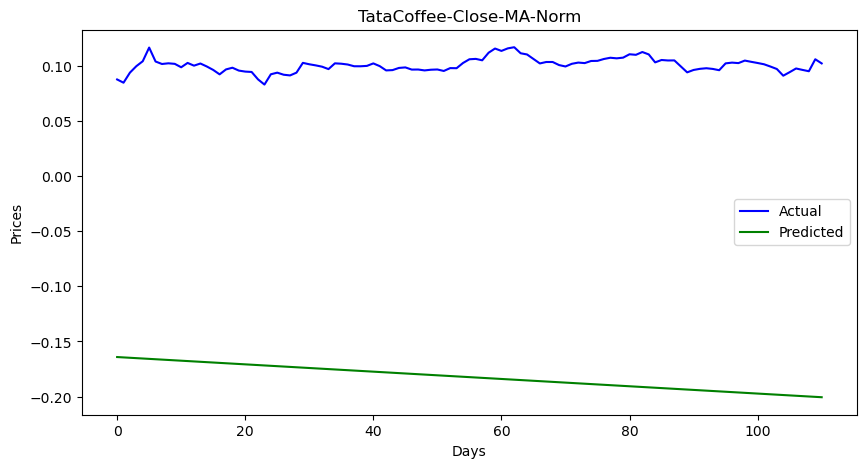

In [161]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-MA-Norm","Days","Prices")

In [162]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [163]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

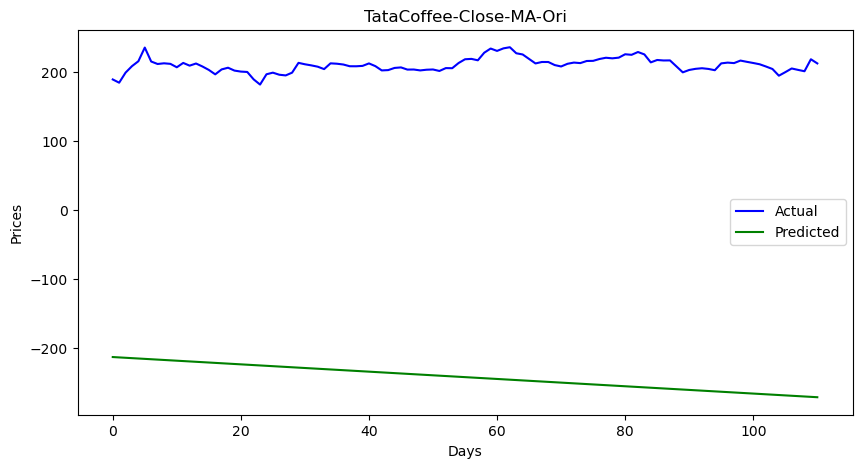

In [164]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-MA-Ori","Days","Prices")

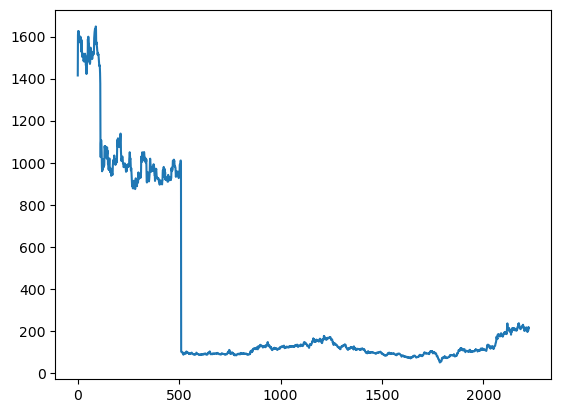

In [165]:
from matplotlib import pyplot as plt
plt.plot(stk_data["Close"])

In [166]:
# !pip install pmdarima

In [167]:
from pmdarima import auto_arima

model = auto_arima(
    x_train,
    seasonal=False,
    trace=True,
    error_action="ignore",
    suppress_warnings=True,
    stepwise=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-11932.947, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11935.683, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11938.161, Time=0.98 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11938.288, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11936.333, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-11936.438, Time=0.88 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-11936.770, Time=0.73 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-11934.919, Time=0.66 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-11939.079, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-11937.169, Time=0.50 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-11937.328, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-11938.953, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-11935.526, Time=0.32 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 6.418 seco

In [168]:
n_periods = len(x_test)
forecast = model.predict(n_periods=n_periods)

In [169]:
rmse_scaled = mean_squared_error(x_test, forecast, squared=False)
r2_scaled = r2_score(x_test, forecast)
print(f"RMSE (scaled): {rmse_scaled:.4f}")
print(f"R² (scaled):   {r2_scaled:.4f}")


RMSE (scaled): 0.0139
R² (scaled):   -3.8912


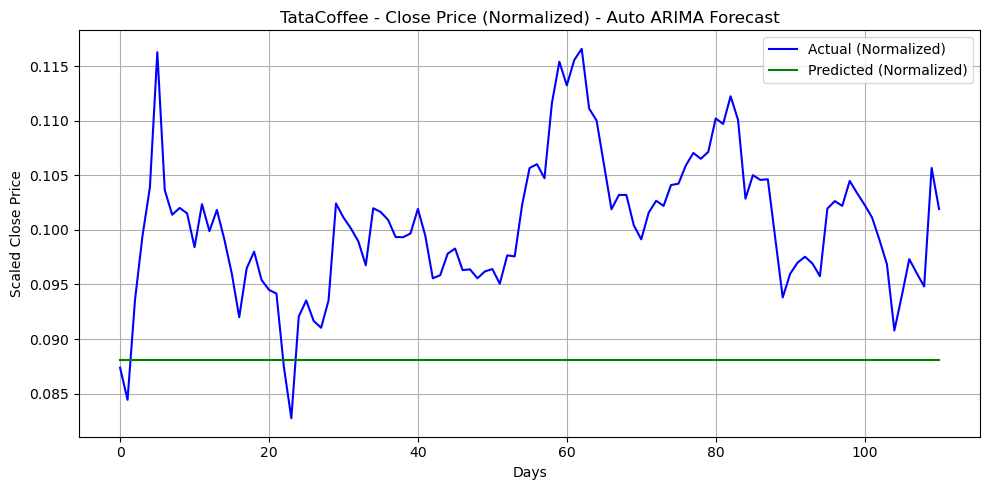

In [170]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(x_test)), x_test, label='Actual (Normalized)', color='blue')
plt.plot(range(len(x_test)), forecast, label='Predicted (Normalized)', color='green')
plt.title("TataCoffee - Close Price (Normalized) - Auto ARIMA Forecast")
plt.xlabel("Days")
plt.ylabel("Scaled Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

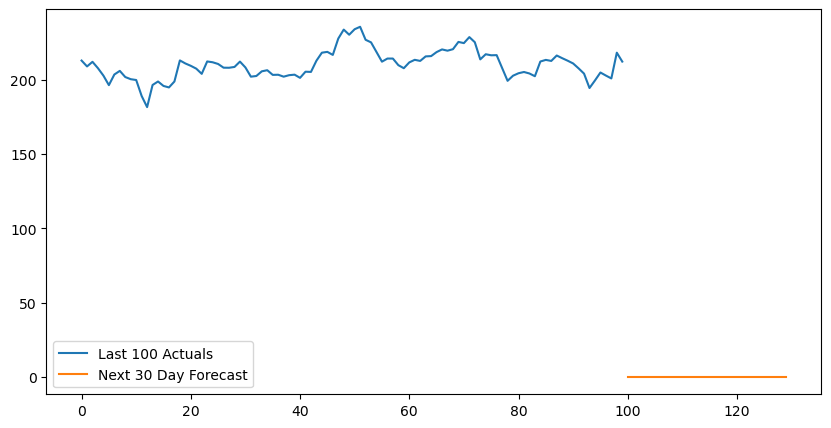

In [171]:
plt.figure(figsize=(10, 5))
plt.plot(stk_data[column].values[-100:], label="Last 100 Actuals")
future_pred = model.predict(n_periods=30)
plt.plot(range(100, 130), future_pred, label="Next 30 Day Forecast")
plt.legend()
plt.show()
